In [ ]:
# kNN-> 3; standard scaler

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [3]:
data = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
X=data.drop(["Diabetes_012"],axis=1)
Y=data["Diabetes_012"]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=20)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(202944, 21)
(202944,)
(50736, 21)
(50736,)


In [6]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

for col in X_train.columns:
  X_train[col] = std_scaler.fit_transform(X_train[[col]])

for col in X_test.columns:
  X_test[col] = std_scaler.fit_transform(X_test[[col]])

In [7]:
def custom_logging(y_true, y_pred,  verbose = 1, save_fig = False):
    mcc = matthews_corrcoef(y_true = y_true, y_pred = y_pred)

    acc = accuracy_score(y_true = y_true, y_pred = y_pred)
    f1 = f1_score(y_true = y_true, y_pred = y_pred, average='weighted')



    if verbose:
        print(classification_report(y_true, y_pred, target_names=['0', '1', '2']))
        
        print()
        print(f"ACC: \t{acc}")
        print(f"MCC: \t{mcc}")

        cf = confusion_matrix(y_true=y_true, y_pred = y_pred)
        print('Confusion matrix: ')
        fig, axs = plt.subplots(nrows = 2, ncols = 1, sharey = True, sharex = True)
        sns.heatmap(cf, annot = True, cmap = 'Greens', ax = axs[0], fmt = 'd')
        sns.heatmap(cf/np.sum(cf), annot = True, cmap = 'Greens', ax = axs[1], fmt = '.3g')
        for ax in axs:
            ax.set_ylabel('True labels')
        ax.set_xlabel('Predicted labels')
        
        if save_fig:
            filename = input('Please provide a name for the plot to be saved: ')
            plt.savefig('/data/'+ filename)

In [17]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [18]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1)

In [19]:
y = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     42753
           1       0.05      0.00      0.00       927
           2       0.40      0.20      0.27      7056

    accuracy                           0.83     50736
   macro avg       0.44      0.39      0.39     50736
weighted avg       0.78      0.83      0.80     50736


ACC: 	0.8307907600126143
MCC: 	0.2022280027372804
Confusion matrix: 


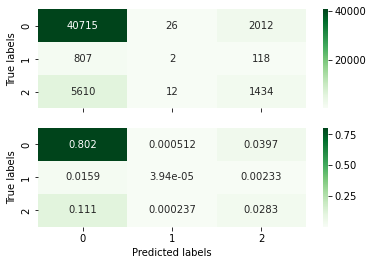

In [24]:
custom_logging(Y_test, y)

In [26]:
sampling_strategy = {0: 50000, 1:Y_train.value_counts().sort_index()[1], 2: Y_train.value_counts().sort_index()[2]}
rus = RandomUnderSampler(sampling_strategy = sampling_strategy, random_state = 20)

X_res, Y_res = rus.fit_resample(X_train,Y_train)
print(X_res.shape)

print("Original dataset: ")
print(Y_train.value_counts())
print("Resampled dataset:")
print(Y_res.value_counts())

(81994, 21)
Original dataset: 
0.0    170950
2.0     28290
1.0      3704
Name: Diabetes_012, dtype: int64
Resampled dataset:
0.0    50000
2.0    28290
1.0     3704
Name: Diabetes_012, dtype: int64


              precision    recall  f1-score   support

           0       0.90      0.80      0.85     42753
           1       0.03      0.01      0.01       927
           2       0.30      0.53      0.38      7056

    accuracy                           0.75     50736
   macro avg       0.41      0.45      0.41     50736
weighted avg       0.80      0.75      0.77     50736


ACC: 	0.7457820876695049
MCC: 	0.25618274507681116
Confusion matrix: 


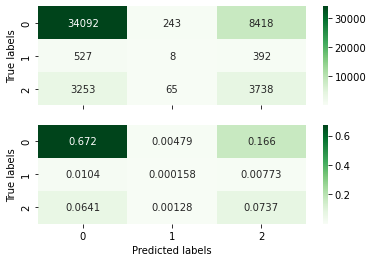

In [34]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     42753
           1       0.02      0.01      0.01       927
           2       0.32      0.54      0.40      7056

    accuracy                           0.76     50736
   macro avg       0.41      0.45      0.42     50736
weighted avg       0.81      0.76      0.78     50736


ACC: 	0.7581993062125513
MCC: 	0.27795974345836744
Confusion matrix: 


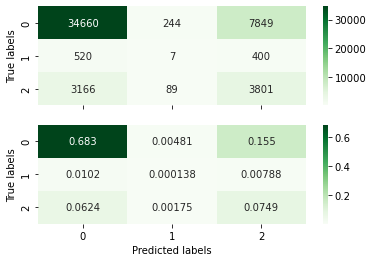

In [32]:
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     42753
           1       0.00      0.00      0.00       927
           2       0.33      0.56      0.41      7056

    accuracy                           0.77     50736
   macro avg       0.41      0.46      0.42     50736
weighted avg       0.81      0.77      0.78     50736


ACC: 	0.7667730999684642
MCC: 	0.2987752075457979
Confusion matrix: 


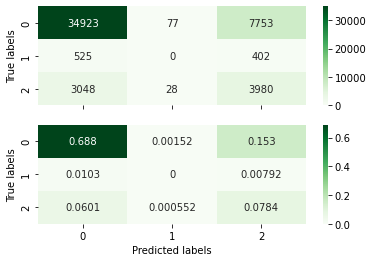

In [33]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     42753
           1       0.00      0.00      0.00       927
           2       0.33      0.57      0.42      7056

    accuracy                           0.77     50736
   macro avg       0.41      0.46      0.43     50736
weighted avg       0.81      0.77      0.78     50736


ACC: 	0.7701237779880163
MCC: 	0.30654443334668835
Confusion matrix: 


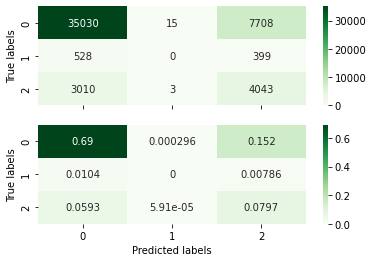

In [35]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     42753
           1       0.00      0.00      0.00       927
           2       0.34      0.58      0.42      7056

    accuracy                           0.77     50736
   macro avg       0.41      0.47      0.43     50736
weighted avg       0.81      0.77      0.79     50736


ACC: 	0.7718582466099022
MCC: 	0.31084717011996965
Confusion matrix: 


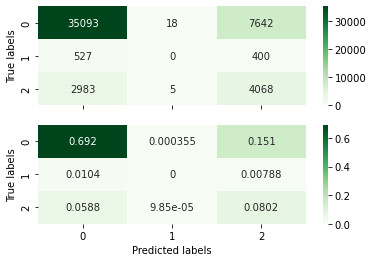

In [36]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     42753
           1       0.00      0.00      0.00       927
           2       0.34      0.58      0.43      7056

    accuracy                           0.77     50736
   macro avg       0.42      0.47      0.43     50736
weighted avg       0.81      0.77      0.79     50736


ACC: 	0.774617628508357
MCC: 	0.31785930089357095
Confusion matrix: 


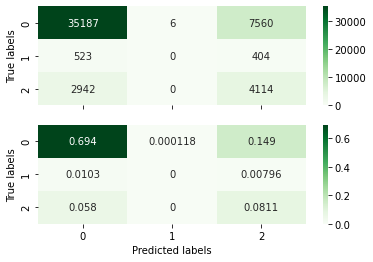

In [37]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     42753
           1       0.00      0.00      0.00       927
           2       0.34      0.59      0.43      7056

    accuracy                           0.78     50736
   macro avg       0.42      0.47      0.43     50736
weighted avg       0.82      0.78      0.79     50736


ACC: 	0.7758199306212551
MCC: 	0.32193027669826624
Confusion matrix: 


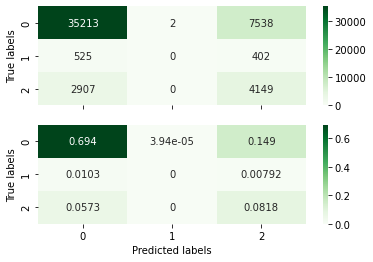

In [38]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     42753
           1       0.00      0.00      0.00       927
           2       0.35      0.59      0.44      7056

    accuracy                           0.78     50736
   macro avg       0.42      0.47      0.43     50736
weighted avg       0.82      0.78      0.79     50736


ACC: 	0.7775938189845475
MCC: 	0.32776477760005635
Confusion matrix: 


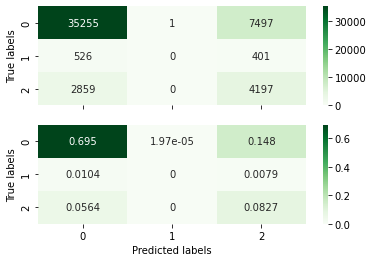

In [39]:
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     42753
           1       0.00      0.00      0.00       927
           2       0.35      0.60      0.44      7056

    accuracy                           0.78     50736
   macro avg       0.42      0.48      0.44     50736
weighted avg       0.82      0.78      0.79     50736


ACC: 	0.7785596026490066
MCC: 	0.3329347834733363
Confusion matrix: 


/home/hdd_n/mambaforge/envs/exp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hdd_n/mambaforge/envs/exp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hdd_n/mambaforge/envs/exp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


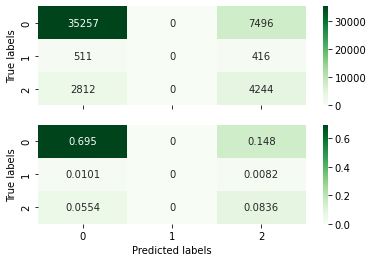

In [40]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     42753
           1       0.00      0.00      0.00       927
           2       0.35      0.60      0.44      7056

    accuracy                           0.78     50736
   macro avg       0.42      0.48      0.44     50736
weighted avg       0.82      0.78      0.79     50736


ACC: 	0.7786581520025229
MCC: 	0.3328311203236963
Confusion matrix: 


/home/hdd_n/mambaforge/envs/exp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hdd_n/mambaforge/envs/exp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hdd_n/mambaforge/envs/exp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


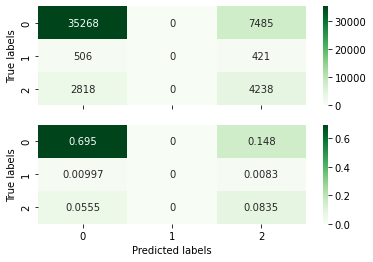

In [41]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(X_res, Y_res)
y = model.predict(X_test)
custom_logging(Y_test, y)